In [ ]:
The equation for the linear hyperplane can be written as:
w^Tx+b = 0
Where:
w is the normal vector to the hyperplane (the direction perpendicular to it).
b is the offset or bias term representing the distance of the hyperplane from the origin along the normal vector w.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('mushroom.csv')

In [5]:
df

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [6]:
df.shape

(2000, 26)

In [8]:
df.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

In [11]:
df['Unnamed: 0']

0       1167
1       1037
2        309
3        282
4        820
        ... 
1995     863
1996    1160
1997     265
1998     411
1999    1073
Name: Unnamed: 0, Length: 2000, dtype: int64

In [12]:
df['sr. No'] = df['Unnamed: 0']

In [16]:
df.rename(columns={'Unnamed: 0': 'Sr. no'}, inplace=True)

In [20]:
df.drop(columns = ['sr. No'])

,Sr. no,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [21]:
df['cap_shape']

0       sunken
1       sunken
2         flat
3         bell
4         flat
         ...  
1995    sunken
1996    sunken
1997    convex
1998      bell
1999    convex
Name: cap_shape, Length: 2000, dtype: object

In [22]:
df['cap_shape'].value_counts()

cap_shape
sunken     439
flat       402
bell       397
convex     381
conical    381
Name: count, dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col])


In [25]:
df

,Sr. no,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter,sr. No
0,889,4,2,7,0,1,1,2,0,7,...,0,2,6,3,1,5,1,916,190,889
1,786,4,0,6,0,1,3,1,1,3,...,0,2,6,1,2,5,0,128,750,786
2,246,3,1,5,1,4,1,1,0,8,...,3,2,6,6,0,5,1,537,281,246
3,221,0,2,4,1,3,3,0,0,6,...,3,2,0,4,1,0,1,234,829,221
4,630,3,3,8,1,5,2,1,1,6,...,2,0,4,8,1,4,1,895,484,630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,656,4,2,0,1,4,0,1,1,3,...,1,1,2,6,0,1,1,283,680,656
1996,885,4,2,5,1,5,0,2,1,9,...,2,1,7,8,2,5,1,335,521,885
1997,205,2,1,3,1,3,3,0,1,7,...,0,2,1,8,0,6,1,859,438,205
1998,329,0,3,7,0,7,2,0,1,6,...,3,1,0,1,5,6,1,679,320,329


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X = df.drop("class", axis=1)
y = df["class"]

# One-hot encode categorical features
X = pd.get_dummies(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [65]:
from sklearn.svm import SVC
# Create SVM with RBF kernel
svm = SVC(kernel='rbf', C=1, gamma=0.1) 
# here i used different value for c and gamma to discver different matrix best one is this one

# Train
svm.fit(X_train, y_train)


SVC(C=1, gamma=0.1)

In [66]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm.predict(X_test)
y_pred

print("rbf Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


rbf Accuracy: 0.885

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.67      0.79       133
           1       0.86      0.99      0.92       267

    accuracy                           0.89       400
   macro avg       0.92      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400


Confusion Matrix:
 [[ 89  44]
 [  2 265]]


In [52]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

svm_linear = SVC(kernel='linear', C=10)
svm_linear.fit(X_train, y_train)

y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel Accuracy:", accuracy_score(y_test, y_pred_linear))
print("\nClassification Report (Linear):\n", classification_report(y_test, y_pred_linear))
print("\nConfusion Matrix (Linear):\n", confusion_matrix(y_test, y_pred_linear))


Linear Kernel Accuracy: 0.6675

Classification Report (Linear):
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       133
           1       0.67      1.00      0.80       267

    accuracy                           0.67       400
   macro avg       0.33      0.50      0.40       400
weighted avg       0.45      0.67      0.53       400


Confusion Matrix (Linear):
 [[  0 133]
 [  0 267]]


C:\Users\HARSHIT SINGH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HARSHIT SINGH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HARSHIT SINGH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [69]:
# Polynomial kernel
svm_poly = SVC(kernel='poly', degree=5, C=1, gamma=0.1)
svm_poly.fit(X_train, y_train)

y_pred_poly = svm_poly.predict(X_test)

print("Polynomial Kernel Accuracy:", accuracy_score(y_test, y_pred_poly))
print("\nClassification Report (Poly):\n", classification_report(y_test, y_pred_poly))
print("\nConfusion Matrix (Poly):\n", confusion_matrix(y_test, y_pred_poly))


Polynomial Kernel Accuracy: 0.88

Classification Report (Poly):
               precision    recall  f1-score   support

           0       0.95      0.68      0.79       133
           1       0.86      0.98      0.92       267

    accuracy                           0.88       400
   macro avg       0.90      0.83      0.85       400
weighted avg       0.89      0.88      0.87       400


Confusion Matrix (Poly):
 [[ 90  43]
 [  5 262]]


In [72]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [1, 10, 50, 100],
    'gamma': ['scale', 0.1, 0.01],
    'kernel': ['rbf', 'poly'],
    'degree': [2, 3]  # Only for poly
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Classification report (precision, recall, f1-score)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Accuracy
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Best Parameters: {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
Best CV Accuracy: 0.85
Confusion Matrix:
 [[ 89  44]
 [  2 265]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.67      0.79       133
           1       0.86      0.99      0.92       267

    accuracy                           0.89       400
   macro avg       0.92      0.83      0.86       400
weighted avg       0.90      0.89      0.88       400

Test Accuracy: 0.885


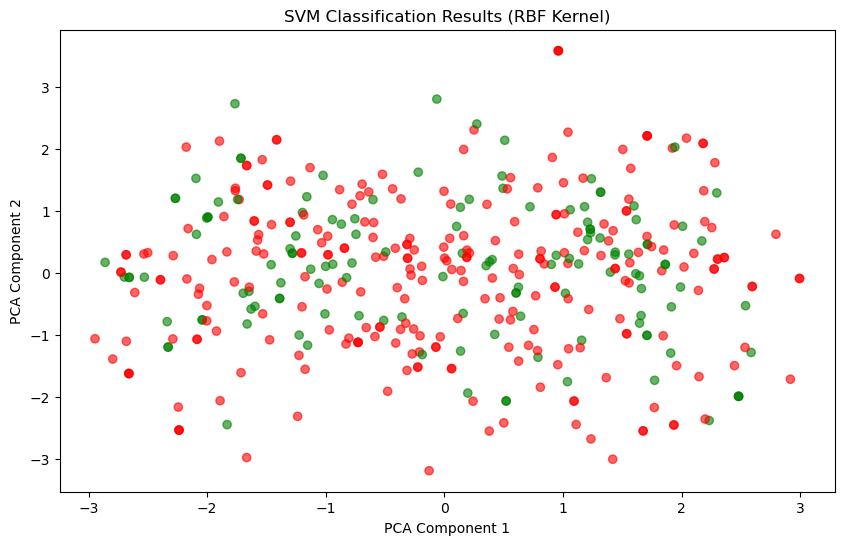

In [73]:
# Since the Mushroom dataset is high-dimensional (many one-hot encoded features), we can reduce dimensions to 2D using PCA to visualize decision boundaries.
# import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_test_2D = pca.fit_transform(X_test)

# Train SVM on full data (for consistency with your best model)
svm_rbf = SVC(kernel='rbf', C=50, gamma=0.1)
svm_rbf.fit(X_train, y_train)

# Predict on 2D projection
y_pred_2D = svm_rbf.predict(X_test)

# Plotting
plt.figure(figsize=(10,6))
colors = ['green' if label==0 else 'red' for label in y_test]
plt.scatter(X_test_2D[:,0], X_test_2D[:,1], c=colors, alpha=0.6, label='Test points')
plt.title("SVM Classification Results (RBF Kernel)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


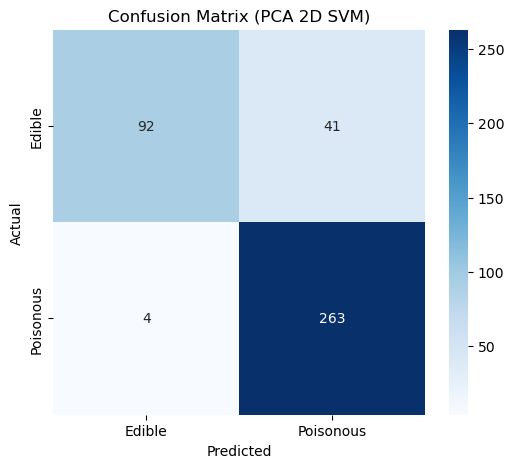

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.80       133
           1       0.87      0.99      0.92       267

    accuracy                           0.89       400
   macro avg       0.91      0.84      0.86       400
weighted avg       0.90      0.89      0.88       400

Test Accuracy: 0.8875


In [74]:
cm_2D = confusion_matrix(y_test, y_pred_2D)

plt.figure(figsize=(6,5))
sns.heatmap(cm_2D, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible','Poisonous'], yticklabels=['Edible','Poisonous'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (PCA 2D SVM)")
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_2D))
print("Test Accuracy:", accuracy_score(y_test, y_pred_2D))
